In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from meteostat import Point, Daily, Hourly
from datetime import datetime
from geopy.geocoders import Nominatim
from sklearn.preprocessing import OneHotEncoder

plt.style.use('ggplot')    # стиль графиков
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [5]:
pd.set_option('display.max_rows', None)

In [7]:
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

In [3]:
df1 = pd.read_csv('Moscow_data_2018_2024.csv', skiprows=6, on_bad_lines='skip', sep=';')
df1.head()

Местное время в Москве (ВДНХ)      T     Po    P    Pa  \
31.05.2024 21:00                           18.1  749.4  762.6  1.6  88.0   
31.05.2024 18:00                           27.2  747.8  760.6 -0.2  39.0   
31.05.2024 15:00                           29.8  748.0  760.7 -0.6  30.0   
31.05.2024 12:00                           28.4  748.6  761.3  0.1  32.0   
31.05.2024 09:00                           26.1  748.5  761.3  0.1  35.0   

                                                       U  DD  Ff  ff10  \
31.05.2024 21:00           Ветер, дующий с северо-запада   1 NaN   NaN   
31.05.2024 18:00     Ветер, дующий с востоко-юго-востока   3 NaN   NaN   
31.05.2024 15:00     Ветер, дующий с востоко-юго-востока   1 NaN   NaN   
31.05.2024 12:00     Ветер, дующий с востоко-юго-востока   2 NaN   NaN   
31.05.2024 09:00  Ветер, дующий с востоко-северо-востока   1 NaN   NaN   

                                        ff3  \
31.05.2024 21:00                      100%.   
31.05.2024 18:00  90  или более, но не 100%   
31.05.2024 15:00                  70 – 80%.   
31.05.2024 12:00               Облаков нет.   
31.05.2024 09:00               Облаков нет.   

                                                                  N  \
31.05.2024 21:00  Гроза (с осадками или без них).  Максимальный ...   
31.05.2024 18:00  Гроза слабая или умеренная без града, но с дож...   
31.05.2024 15:00                                                      
31.05.2024 12:00                                                      
31.05.2024 09:00                                                      

                                                                 WW  \
31.05.2024 21:00              Гроза (грозы) с осадками или без них.   
31.05.2024 18:00  Облака покрывали более половины неба в течение...   
31.05.2024 15:00                                                NaN   
31.05.2024 12:00                                                NaN   
31.05.2024 09:00                                                NaN   

                                                                 W1    W2  \
31.05.2024 21:00                                    Ливень (ливни).   NaN   
31.05.2024 18:00  Облака покрывали более половины неба в течение...   NaN   
31.05.2024 15:00                                                NaN   NaN   
31.05.2024 12:00                                                NaN   NaN   
31.05.2024 09:00                                                NaN  14.2   

                    Tn                                                 Tx  \
31.05.2024 21:00  30.5  Кучево-дождевые лысые с кучевыми, слоисто-куче...   
31.05.2024 18:00   NaN  Кучево-дождевые лысые с кучевыми, слоисто-куче...   
31.05.2024 15:00   NaN  Кучевые средние или мощные или вместе с кучевы...   
31.05.2024 12:00   NaN                                                NaN   
31.05.2024 09:00   NaN                                                NaN   

                                         Cl         Nh  \
31.05.2024 21:00                      100%.   600-1000   
31.05.2024 18:00  90  или более, но не 100%   600-1000   
31.05.2024 15:00                  70 – 80%.  1000-1500   
31.05.2024 12:00                        NaN        NaN   
31.05.2024 09:00                        NaN        NaN   

                                                                  H  \
31.05.2024 21:00                                                NaN   
31.05.2024 18:00  Высококучевых, высокослоистых или слоисто-дожд...   
31.05.2024 15:00  Высококучевых, высокослоистых или слоисто-дожд...   
31.05.2024 12:00                                                NaN   
31.05.2024 09:00                                                NaN   

                                                                 Cm    Ch  \
31.05.2024 21:00                                                NaN  20.0   
31.05.2024 18:00  Перистых, перисто-кучевых или перисто-слоистых...  17.0   
31.05.2024 15:00  Перистых, перисто-кучевых ил

In [4]:
columns = df1.columns.to_list()
columns.remove('Местное время в Москве (ВДНХ)')
df1.columns = columns + [None]
del df1[None]

In [5]:
df1.reset_index(inplace=True)

In [6]:
df1['index'] = pd.to_datetime(df1['index'], format='%d.%m.%Y %H:%M')
df1.set_index('index', inplace=True)
df1.index.name = None

In [7]:
df1 = df1.drop(['ff10','ff3','WW','W1','W2','Tn','Tx','Cl','Ch','tR','E','RRR','Tg',"E'",'sss','Cm','Nh','Ff','H'], axis=1)
df1 = df1.iloc[::-1]

In [8]:
df1.head(10)

T     Po      P   Pa     U  \
2018-01-27 00:00:00 -3.9  760.7  776.1  0.4  48.0   
2018-01-27 03:00:00 -5.1  761.3  776.8  0.6  65.0   
2018-01-27 06:00:00 -6.8  761.4  776.9  0.1  74.0   
2018-01-27 09:00:00 -6.3  761.5  777.0  0.1  85.0   
2018-01-27 12:00:00 -4.5  761.2  776.7 -0.3  83.0   
2018-01-27 15:00:00 -3.5  760.1  775.5 -1.1  69.0   
2018-01-27 18:00:00 -4.3  759.0  774.4 -1.1  66.0   
2018-01-27 21:00:00 -5.1  758.3  773.7 -0.7  68.0   
2018-01-28 00:00:00 -6.0  757.6  773.1 -0.7  77.0   
2018-01-28 03:00:00 -6.1  757.9  773.3  0.3  78.0   

                                                  DD      N    VV    Td  
2018-01-27 00:00:00              Ветер, дующий с юга  100%.   NaN -13.3  
2018-01-27 03:00:00              Ветер, дующий с юга  100%.   NaN -10.7  
2018-01-27 06:00:00              Ветер, дующий с юга  100%.   NaN -10.7  
2018-01-27 09:00:00              Ветер, дующий с юга  100%.  10.0  -8.5  
2018-01-27 12:00:00              Ветер, дующий с юга  100%.  10.0  -7.0  
2018-01-27 15:00:00  Ветер, дующий с юго-юго-востока  100%.  10.0  -8.5  
2018-01-27 18:00:00  Ветер, дующий с юго-юго-востока  100%.   NaN  -9.8  
2018-01-27 21:00:00              Ветер, дующий с юга  100%.   NaN -10.1  
2018-01-28 00:00:00              Ветер, дующий с юга  100%.   NaN  -9.4  
2018-01-28 03:00:00   Ветер, дующий с юго-юго-запада  100%.   NaN  -9.3

In [9]:
df1.index = pd.to_datetime(df1.index)
df1 = df1[df1.index >= '2019-05-24']

In [10]:
df_daily_U_avg = df1["U"].resample('D').mean()

In [11]:
df_daily_U_avg

2019-05-24    64.125
2019-05-25    56.625
2019-05-26    62.375
2019-05-27    52.500
2019-05-28    48.250
               ...  
2024-05-27    47.500
2024-05-28    47.125
2024-05-29    49.750
2024-05-30    51.125
2024-05-31    52.875
Freq: D, Name: U, Length: 1835, dtype: float64

In [18]:
# Функция для получения координат города
def get_city_coordinates(city_name):
    geolocator = Nominatim(user_agent="weather_data_fetcher")
    location = geolocator.geocode(city_name)
    return location.latitude, location.longitude

city_name = "Moscow"
latitude, longitude = get_city_coordinates(city_name)

start = datetime(2019, 5, 24)
end = datetime(2024, 5, 31, 23, 59)


location = Point(latitude, longitude)

dataset = Daily('27612', start, end)
dataset = dataset.fetch()

dataset

tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
time                                                                     
2019-05-24  13.6   8.9  17.5   0.0   NaN   74.0   4.7   NaN  1012.7   NaN
2019-05-25  15.6  11.8  18.9   0.3   NaN  144.0   4.6   NaN  1010.2   NaN
2019-05-26  18.1  14.3  23.6   0.0   NaN  251.0   2.4   NaN  1004.7   NaN
2019-05-27  16.7  12.5  21.2   0.0   NaN  272.0   4.7   NaN  1008.5   NaN
2019-05-28  22.0  15.9  28.4   0.0   NaN  211.0   2.9   NaN  1014.1   NaN
...          ...   ...   ...   ...   ...    ...   ...   ...     ...   ...
2024-05-27  18.0  11.4  22.8   0.0   NaN   74.0   2.7   NaN  1027.4   NaN
2024-05-28  19.6  11.3  25.4   0.0   NaN  148.0   1.7   NaN  1023.6   NaN
2024-05-29  21.6  13.6  28.0   0.0   NaN   45.0   1.5   NaN  1017.3   NaN
2024-05-30  22.6  15.9  27.9   0.0   NaN  127.0   1.9   NaN  1014.1   NaN
2024-05-31  22.6  15.8  29.8   0.0   NaN  116.0   2.7   NaN  1015.0   NaN

[1835 rows x 10 columns]

In [19]:
dataset.drop(['wpgt', 'tsun', 'wdir'], axis=1, inplace=True)

In [20]:
dataset = pd.concat([dataset, df_daily_U_avg], axis=1)
dataset.index.name = "time"

In [21]:
dataset.head()

tavg  tmin  tmax  prcp  snow  wspd    pres       U
time                                                          
2019-05-24  13.6   8.9  17.5   0.0   NaN   4.7  1012.7  64.125
2019-05-25  15.6  11.8  18.9   0.3   NaN   4.6  1010.2  56.625
2019-05-26  18.1  14.3  23.6   0.0   NaN   2.4  1004.7  62.375
2019-05-27  16.7  12.5  21.2   0.0   NaN   4.7  1008.5  52.500
2019-05-28  22.0  15.9  28.4   0.0   NaN   2.9  1014.1  48.250

In [22]:
for column in dataset.columns:
    if dataset[column].isnull().any():
        print(f"В столбце '{column}' есть пропуски.")
    else:
        print(f"В столбце '{column}' пропусков нет.")

В столбце 'tavg' пропусков нет.
В столбце 'tmin' пропусков нет.
В столбце 'tmax' пропусков нет.
В столбце 'prcp' есть пропуски.
В столбце 'snow' есть пропуски.
В столбце 'wspd' пропусков нет.
В столбце 'pres' пропусков нет.
В столбце 'U' пропусков нет.


In [24]:
dataset["snow"].fillna(0, inplace=True)
dataset["prcp"].fillna(0, inplace=True) # суточная сумма осадков

The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [25]:
dataset.columns = ['Среднняя t', 'Минимальная t', 'Максимальная t', 'Суточная сумма осадков', 'Глубина снега', 'Скорость ветра', 'Среднее давление hPa', 'Относительная влажность в %']

In [26]:
dataset.head()

Среднняя t  Минимальная t  Максимальная t  Суточная сумма осадков  \
time                                                                            
2019-05-24        13.6            8.9            17.5                     0.0   
2019-05-25        15.6           11.8            18.9                     0.3   
2019-05-26        18.1           14.3            23.6                     0.0   
2019-05-27        16.7           12.5            21.2                     0.0   
2019-05-28        22.0           15.9            28.4                     0.0   

            Глубина снега  Скорость ветра  Среднее давление hPa  \
time                                                              
2019-05-24            0.0             4.7                1012.7   
2019-05-25            0.0             4.6                1010.2   
2019-05-26            0.0             2.4                1004.7   
2019-05-27            0.0             4.7                1008.5   
2019-05-28            0.0             2.9                1014.1   

            Относительная влажность в %  
time                                     
2019-05-24                       64.125  
2019-05-25                       56.625  
2019-05-26                       62.375  
2019-05-27                       52.500  
2019-05-28                       48.250

<Axes: >

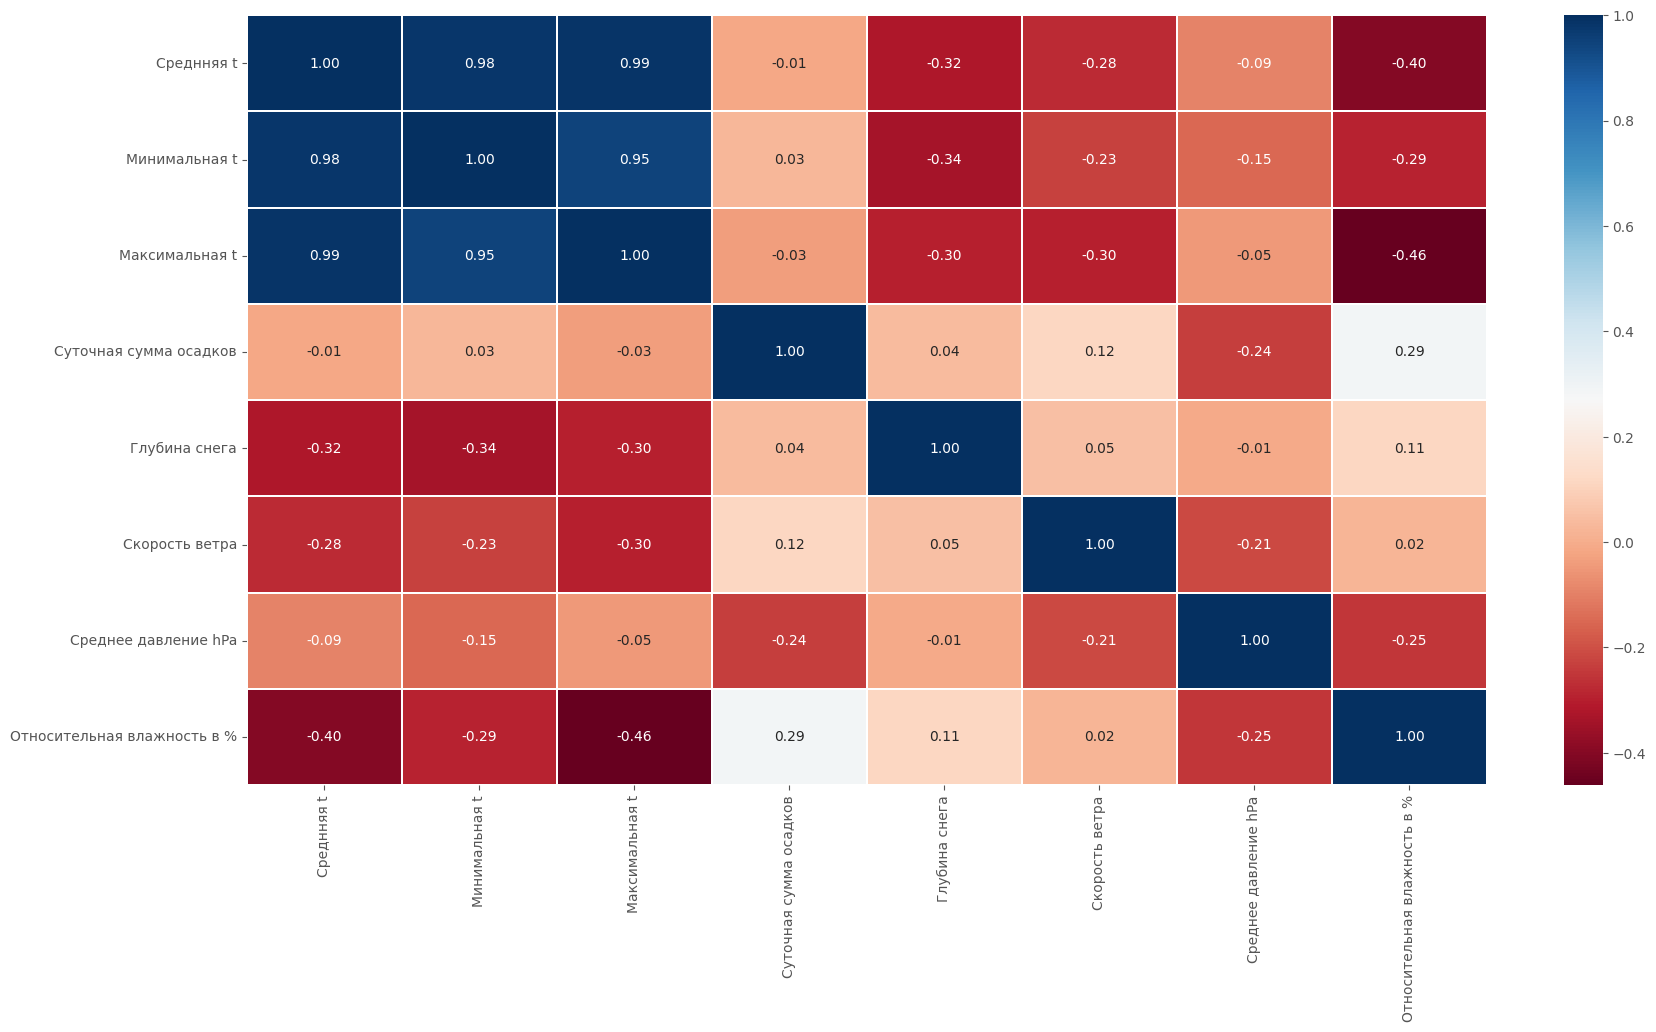

In [27]:
fig, ax = plt.subplots(figsize=(20, 10), dpi = 100)
sns.heatmap(dataset.corr(method='pearson'), linewidths= .3, annot=True, fmt=".2f", cmap= 'RdBu')

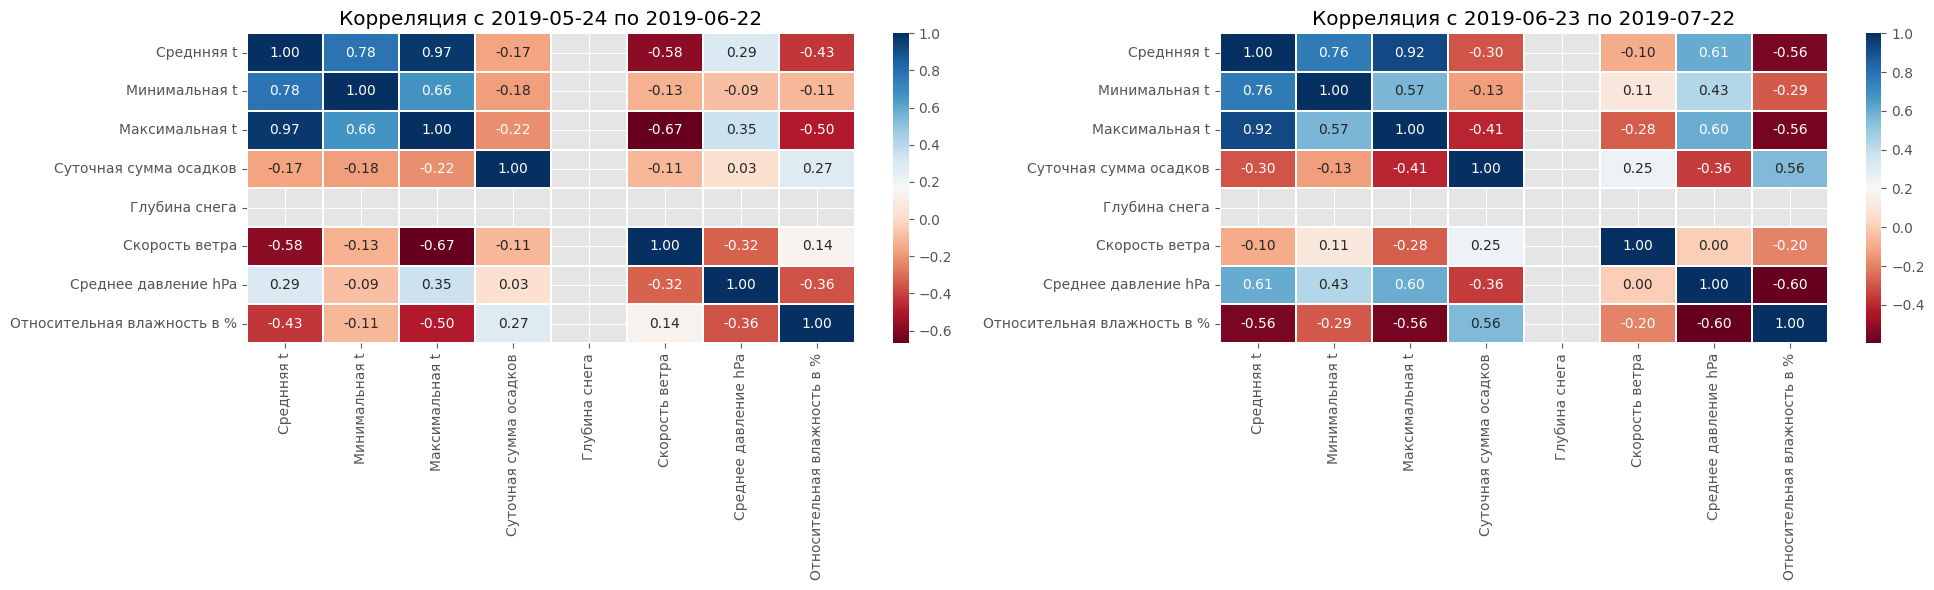

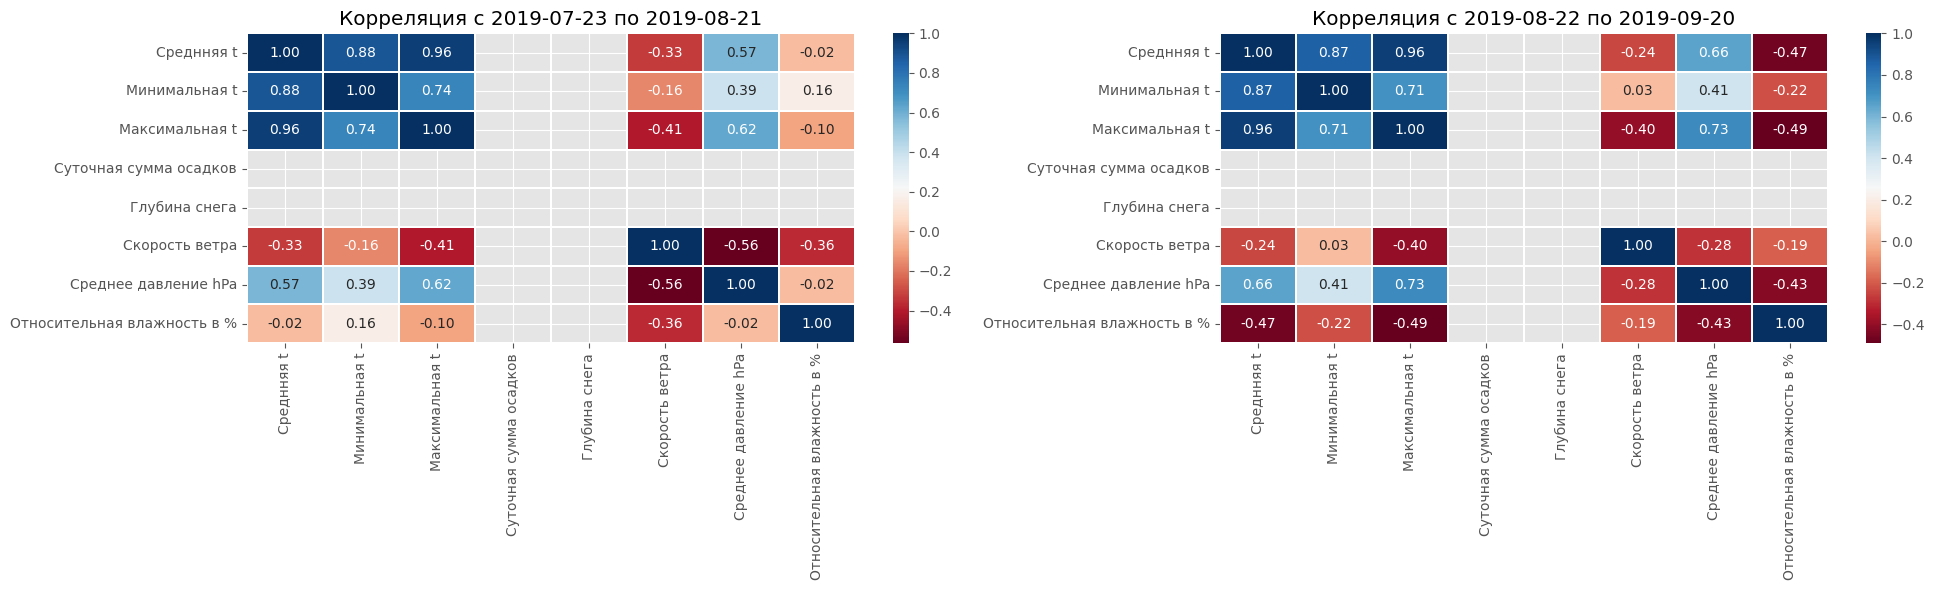

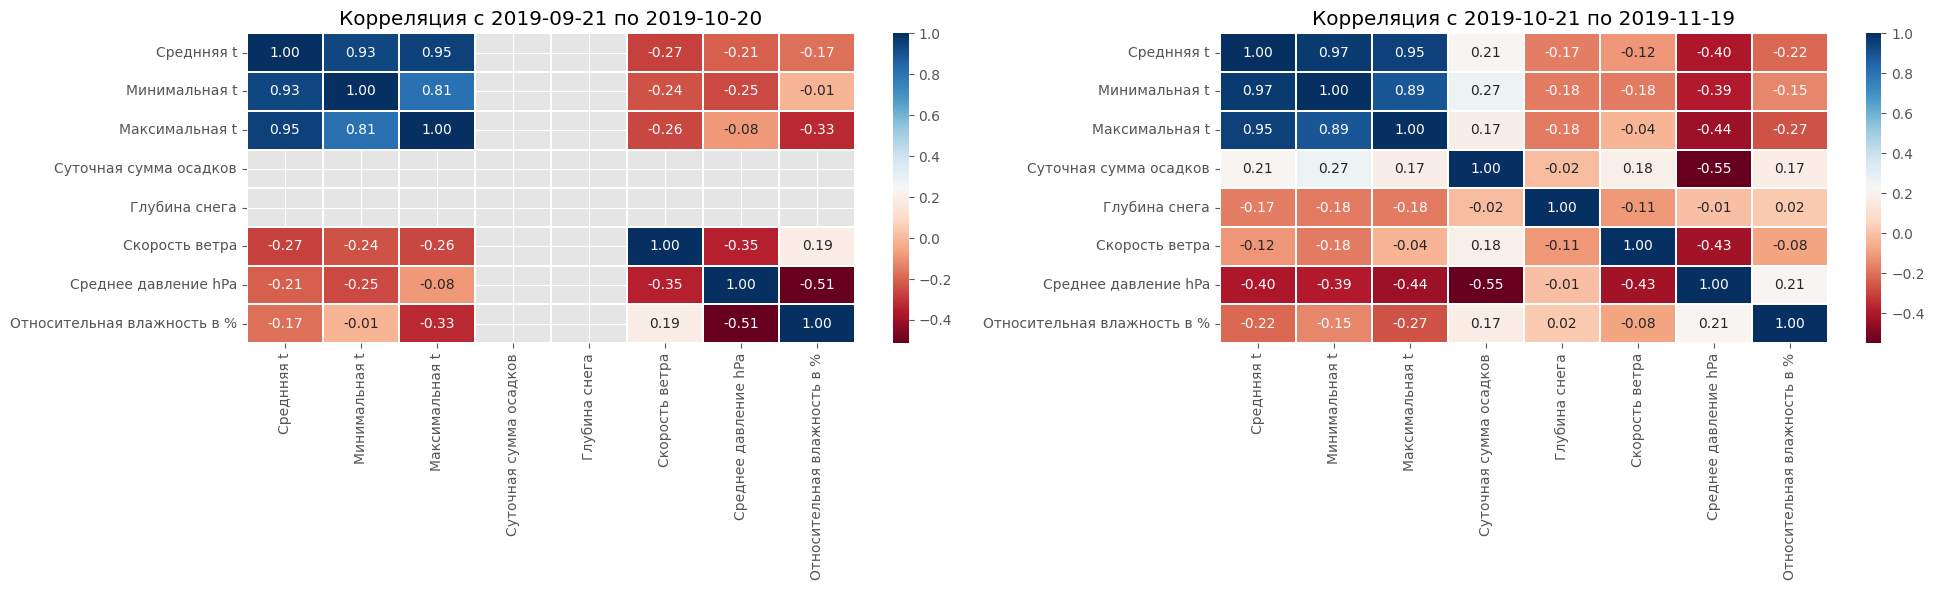

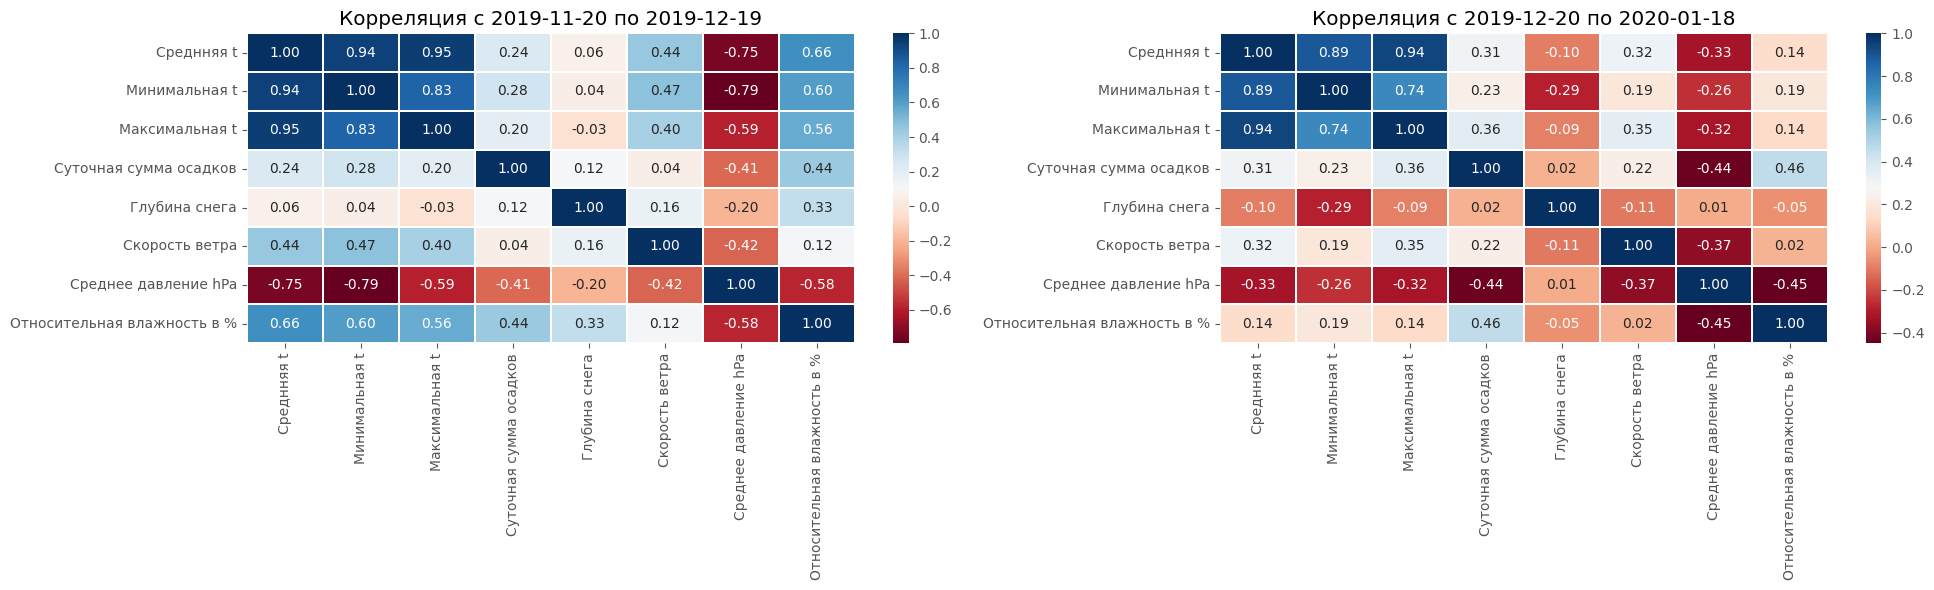

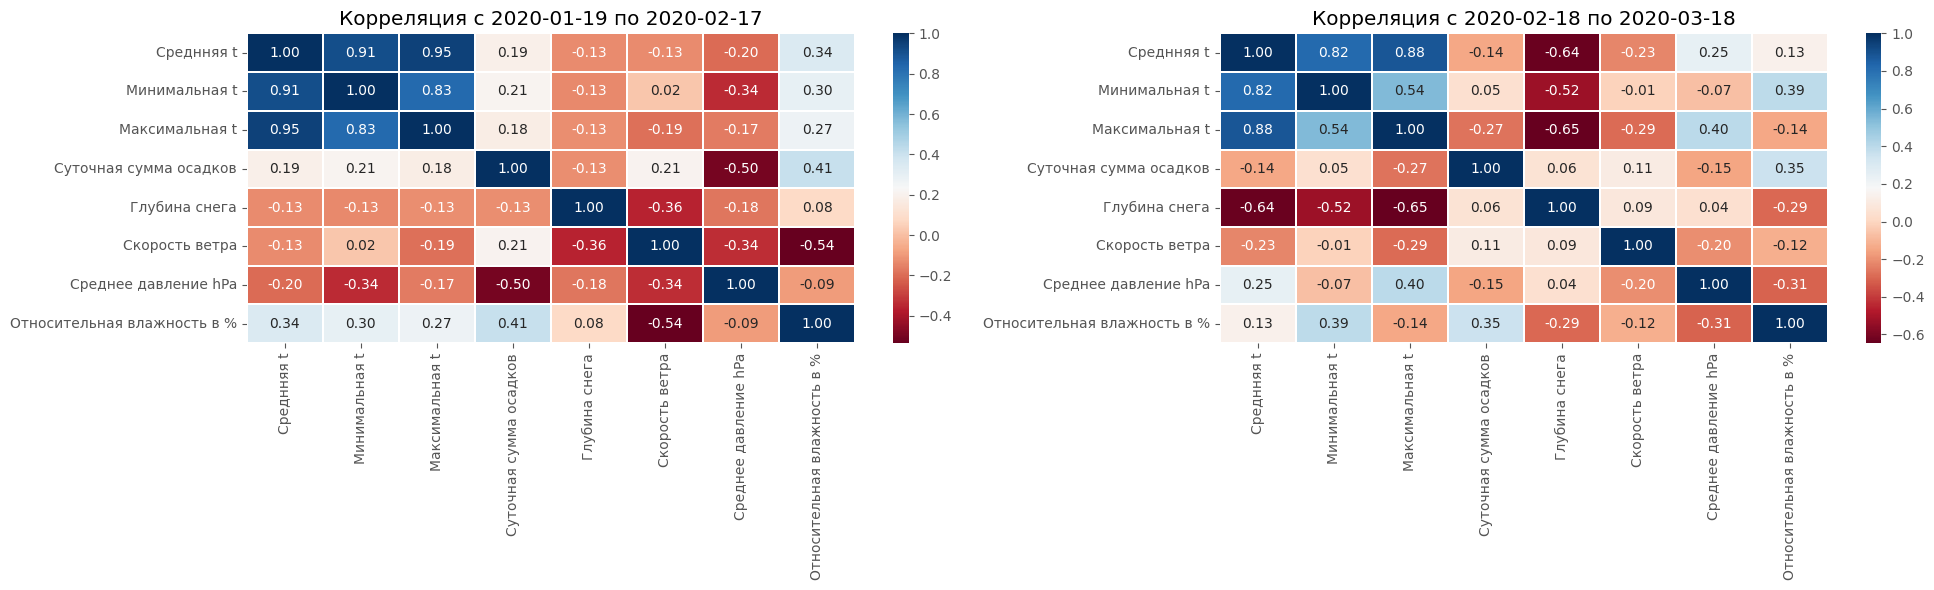

<Figure size 640x480 with 0 Axes>

In [29]:
# Количество строк в одном окне
window_size = 30

# Цикл по подгруппам по window_size строк
for i in range(0, 300, window_size):
    subset = dataset.iloc[i:i+window_size]

    if len(subset) < window_size:
        break

    correlation_matrix = subset.corr(method='pearson')

    if i % (window_size * 2) == 0:
        fig, axes = plt.subplots(1, 2, figsize=(20, 6), dpi=100)
    
    ax = axes[i // window_size % 2]

    sns.heatmap(correlation_matrix, linewidths=0.3, annot=True, fmt=".2f", cmap='RdBu', ax=ax)

    start_date = subset.index[0].strftime('%Y-%m-%d')
    end_date = subset.index[-1].strftime('%Y-%m-%d')

    ax.set_title(f'Корреляция с {start_date} по {end_date}')
    
    if (i // window_size + 1) % 2 == 0:
        plt.tight_layout()
        plt.show()

if len(dataset) % (window_size * 2) != 0:
    plt.tight_layout()
    plt.show()

In [78]:
dataset.to_csv('dataset_days.csv')